In [2]:
import wooldridge as woo
df = woo.data('rental')
df.head()

,city,year,pop,enroll,rent,rnthsg,tothsg,avginc,lenroll,lpop,...,lavginc,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90
0,1,80,75211.0,15303.0,197,13475.0,26167.0,11537.0,9.635804,11.228053,...,9.353314,NaN,NaN,NaN,NaN,NaN,NaN,20.346758,NaN,0
1,1,90,77759.0,18017.0,342,15660.0,29467.0,19568.0,9.799071,11.261370,...,9.881651,-15293.201172,0.033317,0.551607,0.118772,0.150273,0.528337,23.170309,2.823551,1
2,2,80,106743.0,22462.0,323,14580.0,37277.0,19841.0,10.019580,11.578179,...,9.895506,NaN,NaN,NaN,NaN,NaN,NaN,21.043066,NaN,0
3,2,90,141865.0,29769.0,496,26895.0,55540.0,31885.0,10.301223,11.862631,...,10.369891,-22451.699219,0.284451,0.428924,0.398727,0.612289,0.474385,20.984034,-0.059032,1
4,3,80,36608.0,11847.0,216,7026.0,13482.0,11455.0,9.379830,10.508022,...,9.346182,NaN,NaN,NaN,NaN,NaN,NaN,32.361778,NaN,0


In [12]:

import statsmodels.formula.api as smf
reg = smf.ols("rent ~ avginc + pctstu + rnthsg + tothsg + pop + enroll", data = df)
res = reg.fit()
print(res.params, res.bse)
print(res.summary())

Intercept   -3.618483
avginc       0.015764
pctstu       1.666417
rnthsg       0.006050
tothsg       0.000036
pop         -0.001211
enroll      -0.000465
dtype: float64 Intercept    19.714894
avginc        0.000668
pctstu        0.571887
rnthsg        0.001448
tothsg        0.000099
pop           0.000324
enroll        0.001108
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.83e-45
Time:                        16:56:40   Log-Likelihood:                -676.88
No. Observations:                 128   AIC:                             1368.
Df Residuals:                     121   BIC:                             1388.
Df Model:              

one percent increase in avg income will cause a 0.0157 units increase in average rent

one percent increase percent of college students will cause a 1.7031 increase in average rent

Both are statistically significant

In [40]:
import sklearn.linear_model as slm
regR = slm.Ridge(alpha = 10000, fit_intercept = False)
x = df[["avginc", "enroll", "pctstu", "rnthsg", "tothsg", "pop", "enroll"]]
y = df["rent"]
results = regR.fit(x, y)
print(regR.coef_)


[ 1.59825890e-02  4.69808473e-04  9.27950999e-01  5.99279582e-03
  3.17624373e-05 -1.37167359e-03  4.69808473e-04]


In [39]:
import sklearn.linear_model as slm
regR = slm.Lasso(alpha = 1000, fit_intercept = False)
regR.fit(x, y)
print(regR.coef_)


[ 1.63991108e-02  9.30276225e-04  0.00000000e+00  5.73291753e-03
  2.75106062e-05 -1.54018531e-03  1.86626207e-03]


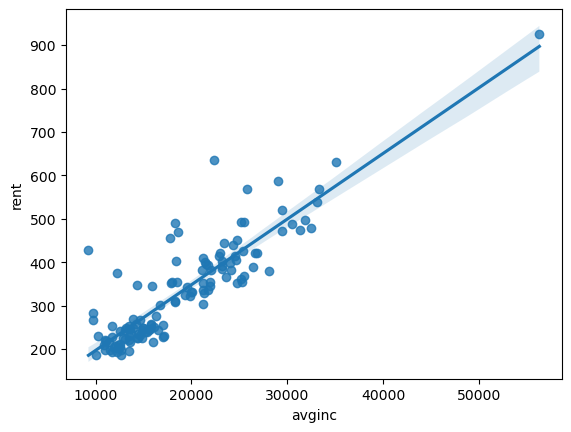

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = "avginc", y = "rent", data = df)
plt.show()

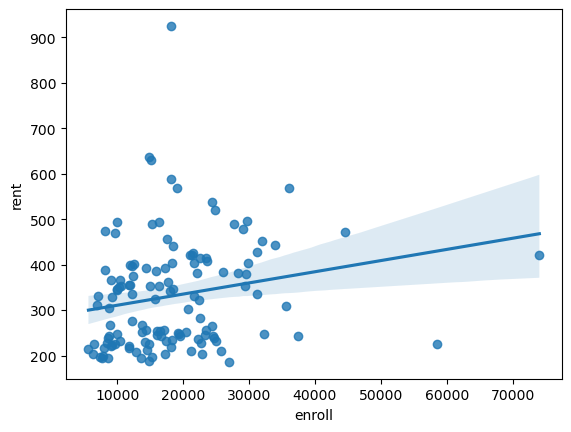

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = "enroll", y = "rent", data = df)
plt.show()

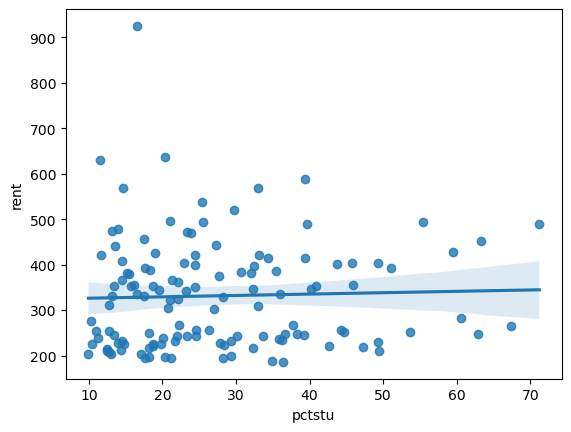

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = "pctstu", y = "rent", data = df)
plt.show()

In [8]:
y80 = df["y90"] == 0
y90 = df["y90"] == 1
import statsmodels.formula.api as smf
reg1 = smf.ols("rent ~ avginc + pctstu + rnthsg + tothsg + pop + enroll", data = df, subset = y80)
res1 = reg1.fit()
print(res1.params, res1.bse)

Intercept    21.560369
avginc        0.013508
pctstu        1.284062
rnthsg        0.003136
tothsg       -0.000643
pop          -0.000274
enroll       -0.000826
dtype: float64 Intercept    16.875961
avginc        0.000931
pctstu        0.349042
rnthsg        0.001181
tothsg        0.001718
pop           0.000559
enroll        0.000715
dtype: float64


In [9]:
y80 = df["y90"] == 0
y90 = df["y90"] == 1
import statsmodels.formula.api as smf
reg1 = smf.ols("rent ~ avginc + pctstu + rnthsg + tothsg + pop + enroll", data = df, subset = y90)
res1 = reg1.fit()
print(res1.params, res1.bse)

Intercept    71.815056
avginc        0.013281
pctstu        1.449818
rnthsg        0.007063
tothsg        0.000017
pop          -0.001545
enroll        0.000197
dtype: float64 Intercept    42.546270
avginc        0.001345
pctstu        1.028142
rnthsg        0.002938
tothsg        0.000127
pop           0.000680
enroll        0.001905
dtype: float64


hypothesis = "(avginc = 0), (pctstu= 0)"
print(res.f_test(hypothesis))

which means that the p-value is smaller than 0.05 and therefore we reject the null hypothesis and it means that there is at least one statistically significant variable in this model.

In [39]:
import linearmodels.iv as iv
reg_iv = iv.IV2SLS.from_formula("rent ~ 1 + [avginc ~ enroll]", data = df)
res_iv = reg_iv.fit()
print(res_iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                   rent   R-squared:                      0.7557
Estimator:                    IV-2SLS   Adj. R-squared:                 0.7538
No. Observations:                 128   F-statistic:                    23.812
Date:                Thu, Nov 30 2023   P-value (F-stat)                0.0000
Time:                        14:37:19   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -1.1716     67.341    -0.0174     0.9861     -133.16      130.81
avginc         0.0176     0.0036     4.8797     0.00

How is rnthsg: renter-occupied units related to avginc: per capita income?
Enroll not significant to rent

In [10]:

import statsmodels.formula.api as smf
reg = smf.ols("avginc ~ enroll", data = df)
res = reg.fit()
print(res.params, res.bse)
print(res.summary())

Intercept    16333.759697
enroll           0.139671
dtype: float64 Intercept    1284.252476
enroll          0.061344
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 avginc   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.184
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0245
Time:                        17:24:28   Log-Likelihood:                -1311.2
No. Observations:                 128   AIC:                             2626.
Df Residuals:                     126   BIC:                             2632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]